We will use the euros as test set for our models. The models are trained over EPL data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as pl

from seaborn import set_style, pairplot
set_style("whitegrid")

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Stats needed

In [3]:
def_stats = ['goals','passes','shots','shots_on_target','xg']
attacking_stats = ['goals','passes','possession','shots','shots_on_target','xg']

#### Loading data and doing initial checks

In [13]:
data_path = './data_raw/Euro_2024_Matches.csv'
euro = pd.read_csv(data_path)

# Removing unwanted columns
cols_not_req = ['stadium','attendance']
cols_not_req += ['Home Accurate passes.1','Away Accurate passes.1', 'Home Expected goals(xG)', 'Away Expected goals(xG)','Home Shots on target.','Away Shots on target.'] # repeated 

euro.drop(cols_not_req,axis='columns',inplace=True)

euro['Home Shots'] = euro['Home Shots off target'] + euro['Home Shots on target']
euro['Away Shots'] = euro['Away Shots off target'] + euro['Away Shots on target']

In [19]:
euro.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals',
       'Home Total shots', 'Home Shots on target', 'Home Big chances',
       'Home Big chances missed', 'Home Accurate passes',
       'Home Fouls committed', 'Home Corners', 'Home Total shots.',
       'Home Shots off target', 'Home Blocked shots', 'Home Hit woodwork',
       'Home Shots inside box', 'Home Shots outside box',
       'Home Expected goals (xG)', 'Home xG open play', 'Home xG set play',
       'Home Non-penalty xG', 'Home xG on target (xGOT)', 'Home Passes',
       'Home Own half', 'Home Opposition half', 'Home Accurate long balls',
       'Home Accurate crosses', 'Home Throws',
       'Home Touches in opposition box', 'Home Offsides', 'Home Yellow cards',
       'Home Red cards', 'Home Tackles won', 'Home Interceptions',
       'Home Blocks', 'Home Clearances', 'Home Keeper saves', 'Home Duels won',
       'Home Ground duels won', 'Home Aerial duels won',
       'Home Successful dribbles', 'Away Total shots',

In [32]:
home_data = pd.DataFrame(columns=attacking_stats + ['opp_'+i for i in def_stats])
att_stats_dic = {'goals':'home_goals',
                'passes':'Home Passes',
                'shots':'Home Shots',
                'shots_on_target':'Home Shots on target',
                'xg': 'Home Expected goals (xG)'}
def_stats_dic = {'opp_goals':'away_goals',
                'opp_passes':'Away Passes',
                'opp_shots':'Away Shots',
                'opp_shots_on_target':'Away Shots on target',
                'opp_xg': 'Away Expected goals (xG)'}

for x,y in att_stats_dic.items():
    home_data[x] = euro[y]
for x,y in def_stats_dic.items():
    home_data[x] = euro[y]

home_data['possession'] = 50
home_data['Win'] = 0
home_data.loc[(home_data['goals']>home_data['opp_goals']),'Win'] = 1
home_data['Draw'] = 0
home_data.loc[(home_data['goals']==home_data['opp_goals']),'Draw'] = 1


In [39]:
away_data = pd.DataFrame(columns=attacking_stats + ['opp_'+i for i in def_stats])
def_stats_dic = {'opp_goals':'home_goals',
                'opp_passes':'Home Passes',
                'opp_shots':'Home Shots',
                'opp_shots_on_target':'Home Shots on target',
                'opp_xg': 'Home Expected goals (xG)'}
att_stats_dic = {'goals':'away_goals',
                'passes':'Away Passes',
                'shots':'Away Shots',
                'shots_on_target':'Away Shots on target',
                'xg': 'Away Expected goals (xG)'}

for x,y in att_stats_dic.items():
    away_data[x] = euro[y]
for x,y in def_stats_dic.items():
    away_data[x] = euro[y]

away_data['possession'] = 50
away_data['Win'] = 0
away_data.loc[(away_data['goals']>away_data['opp_goals']),'Win'] = 1
away_data['Draw'] = 0
away_data.loc[(away_data['goals']==away_data['opp_goals']),'Draw'] = 1

In [41]:
home_data.to_csv('data/home_data_euro.csv')
away_data.to_csv('data/away_data_euro.csv')

In [6]:
euro.head()

,home_team,away_team,home_goals,away_goals,Home Total shots,Home Shots on target,Home Big chances,Home Big chances missed,Home Accurate passes,Home Fouls committed,...,Away Red cards,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles
0,Germany,Scotland,5,1,20,10,1,0,643(94%),15,...,1,8(53%),6,5,22,5,41,34(58%),7(44%),5(56%)
1,Hungary,Switzerland,1,3,6,2,3,2,643(94%),9,...,0,9(69%),6,1,17,1,41,26(45%),15(48%),5(38%)
2,Spain,Croatia,3,0,11,5,4,2,365(83%),14,...,0,10(71%),9,3,4,2,47,37(51%),10(34%),10(77%)
3,Italy,Albania,2,1,17,5,5,4,365(83%),7,...,0,5(63%),13,6,15,3,26,16(39%),10(63%),2(29%)
4,Poland,Netherlands,1,2,12,7,2,2,383(84%),10,...,0,11(79%),3,1,21,6,54,38(56%),16(64%),14(70%)


In [7]:
euro['Winning team'] = 'Draw'
euro.loc[euro['home_goals'] > euro['away_goals'],['Winning team']] = 'Home'
euro.loc[euro['home_goals'] < euro['away_goals'],['Winning team']] = 'Away'
cols = list(euro.columns)
cols = cols[-1:] + cols[:-1]
euro = euro[cols]


In [8]:
euro['Winning team goals'] = euro['home_goals']
euro.loc[euro['Winning team'] == 'Away',['Winning team goals']] = euro.loc[euro['Winning team'] == 'Away','away_goals']
cols = list(euro.columns)
cols = cols[:1] + cols[-1:] + cols[1:-1]
euro = euro[cols]

In [9]:
euro['Winning team'].value_counts()

Winning team
Home    18
Draw    17
Away    15
Name: count, dtype: int64

In [10]:
euro['Home Efficiency'] = euro['home_goals'].values/euro['Home Expected goals (xG)'].values
euro['Away Efficiency'] = euro['away_goals'].values/euro['Away Expected goals (xG)'].values


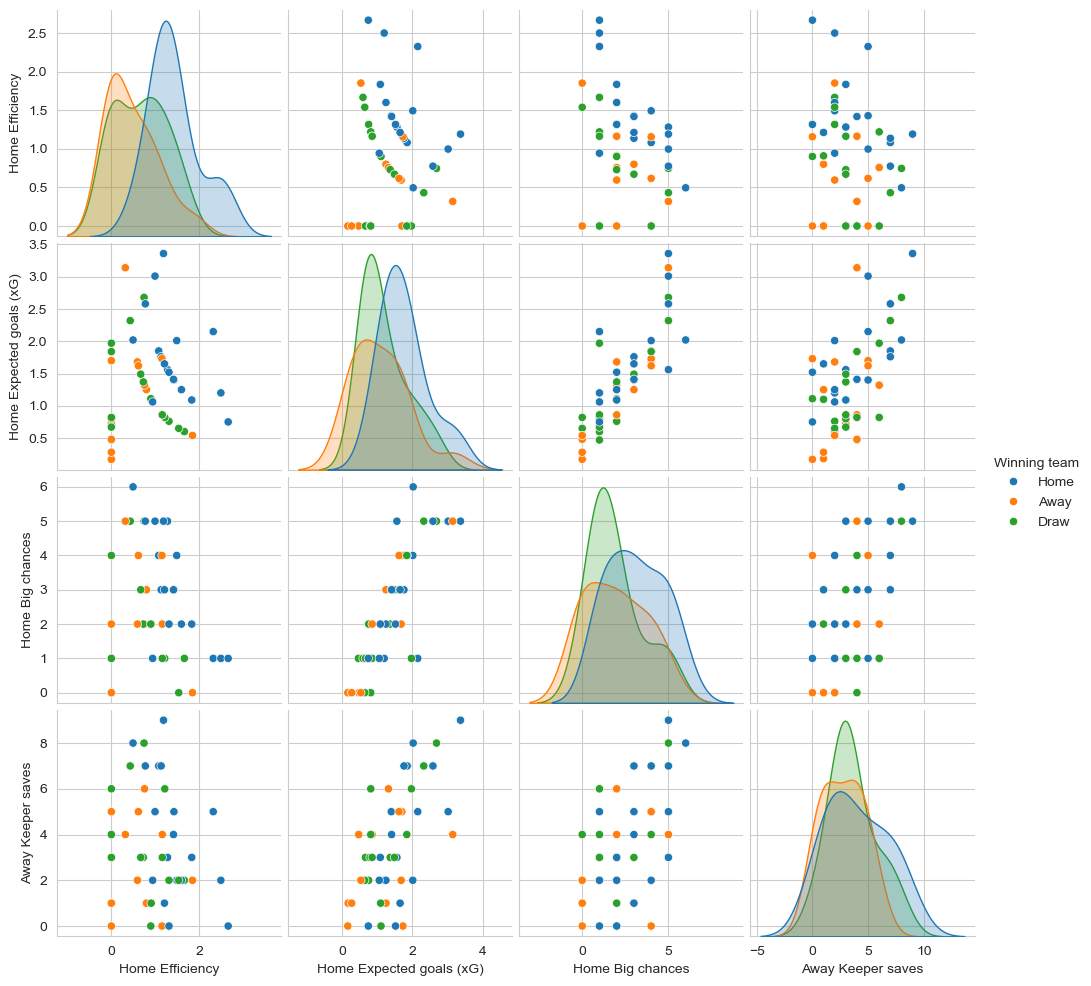

In [15]:
pairplot(euro[['Winning team','Home Efficiency','Home Expected goals (xG)','Home Big chances','Away Keeper saves']],hue='Winning team')


In [20]:
list(zip(list(euro.columns),list(euro.dtypes)))

[('home_team', dtype('O')),
 ('away_team', dtype('O')),
 ('home_goals', dtype('int64')),
 ('away_goals', dtype('int64')),
 ('Home Expected goals(xG)', dtype('float64')),
 ('Home Total shots', dtype('int64')),
 ('Home Shots on target', dtype('int64')),
 ('Home Big chances', dtype('int64')),
 ('Home Big chances missed', dtype('int64')),
 ('Home Accurate passes', dtype('O')),
 ('Home Fouls committed', dtype('int64')),
 ('Home Corners', dtype('int64')),
 ('Home Total shots.', dtype('int64')),
 ('Home Shots off target', dtype('int64')),
 ('Home Shots on target.', dtype('int64')),
 ('Home Blocked shots', dtype('int64')),
 ('Home Hit woodwork', dtype('int64')),
 ('Home Shots inside box', dtype('int64')),
 ('Home Shots outside box', dtype('int64')),
 ('Home Expected goals (xG)', dtype('float64')),
 ('Home xG open play', dtype('float64')),
 ('Home xG set play', dtype('float64')),
 ('Home Non-penalty xG', dtype('float64')),
 ('Home xG on target (xGOT)', dtype('float64')),
 ('Home Passes', dtype(